# CLASIFICACION CON SVM Y NN

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/var/folders/q_/rd0kgjg544v3hq36yl4sjcz40000gn/T/ipykernel_39689/448865255.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### CARGA DEL DATASET

In [2]:
data = pd.read_csv('data.csv')
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [3]:
#Tamaño del dataset
data.shape

(195, 14)

In [4]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


### 1. ANÁLISIS DESCRIPTIVO DE DATOS

In [5]:
#Resumen estadístico de las variables
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


## **1.1. Escriba el código que permita crear gráficos de dispersión de todas las variables:**

<Figure size 2500x2500 with 0 Axes>

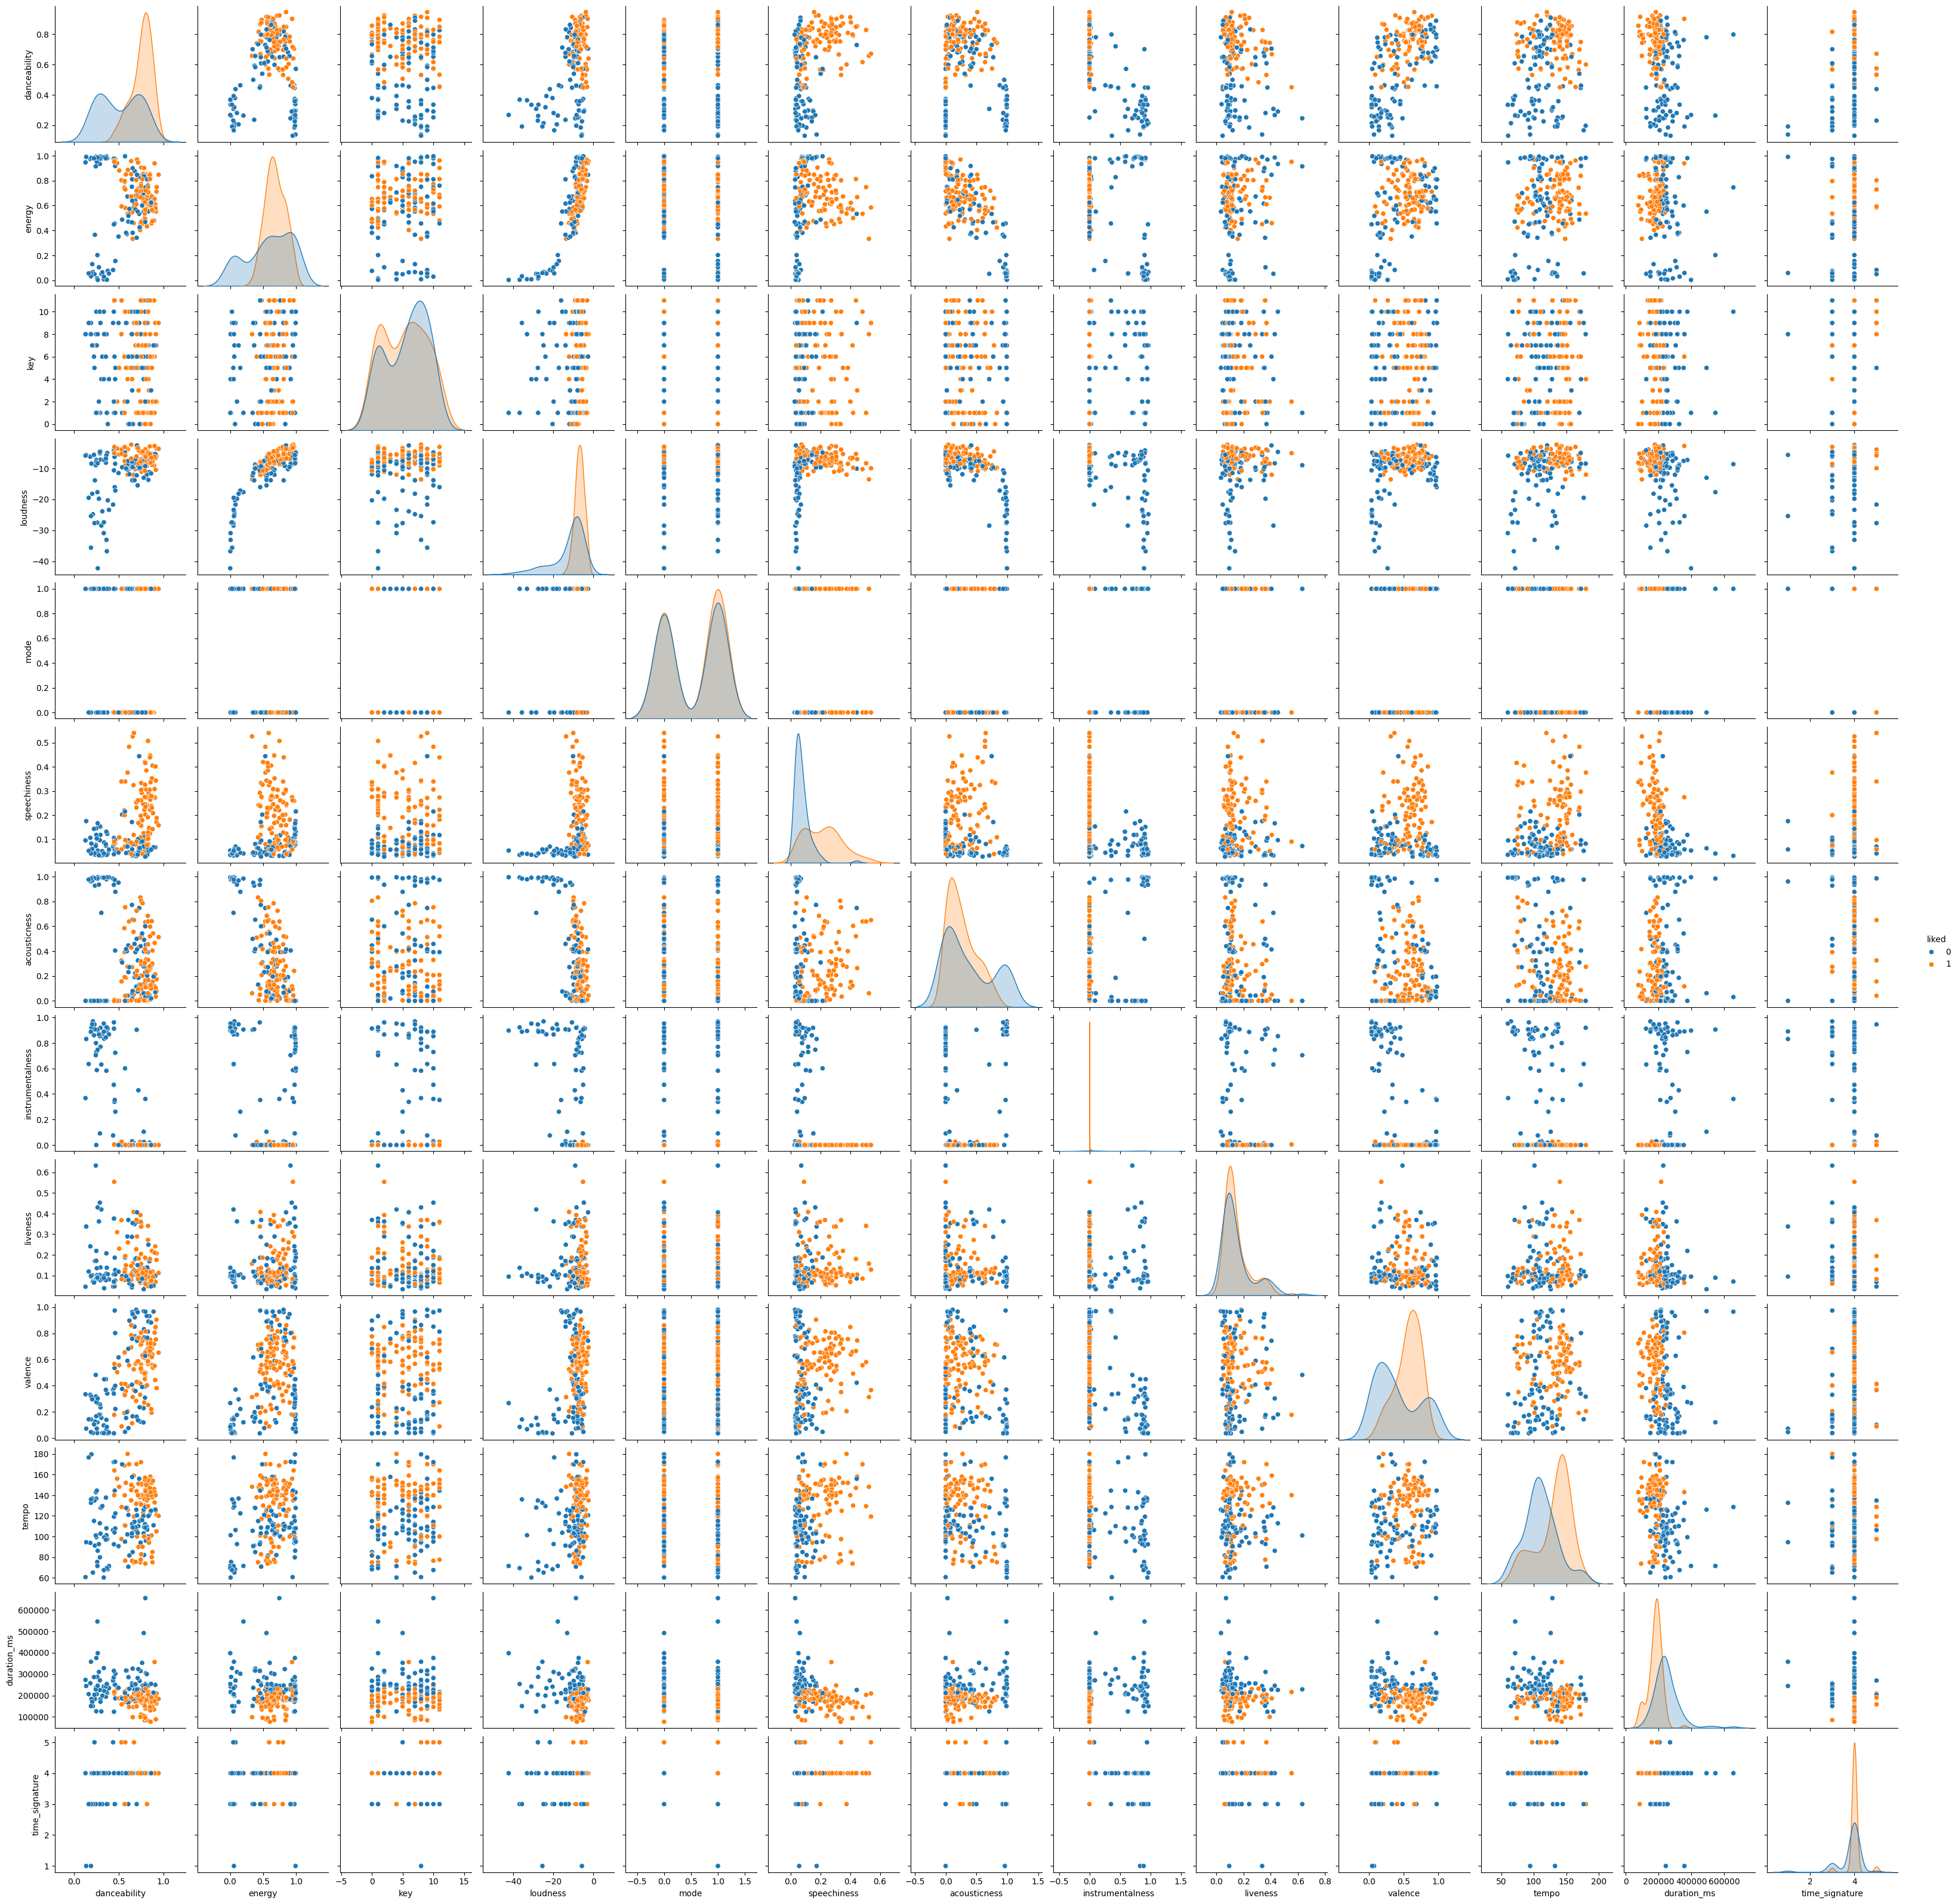

In [6]:
plt.figure(figsize=(25,25)) 

sns.pairplot(data,hue='liked') 

## **1.2. Escriba el código que permita crear la matriz de correlación de todas las variables:**

In [7]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


### 2. PREPROCESAMIENTO DE DATOS

In [8]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [9]:
#Verificar tamaño
data2.shape

(195, 14)

## **2.1. Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:**

In [10]:
sc = StandardScaler() 

data2[['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'energy', 'danceability']] = sc.fit_transform(data2[['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'energy', 'danceability']]) 

In [11]:
data2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658,0
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658,1
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658,0
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658,1
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,-1.080123,-0.807276,2.053103,1.281828,-0.278663,-1.313189,1.982307,-0.095723,-2.027708,0
191,1.042978,-0.055628,-0.733151,-0.330095,0.925820,-0.769808,-0.937289,-0.556512,-0.964551,1.454520,0.136003,0.567357,0.193658,0
192,-0.637128,-1.107943,1.028218,-0.311504,-1.080123,-0.867223,1.974968,-0.556667,-0.288124,0.458295,-1.086013,0.313172,0.193658,0
193,-0.289998,0.349108,1.321780,0.559841,-1.080123,-0.436765,-0.870405,-0.556943,0.430876,-0.301983,-0.376228,-0.321952,2.415023,1


## 3. Aplicación de SVM sobre los datos


In [12]:
# Separación de los datos en train y test
X = data2.drop(columns = 'liked')
y = data2['liked']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

## **3.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y la semilla aleatoria es de 1234:**

In [13]:
modeloSVM = SVC(C = 1, kernel = 'linear', random_state=1234) 

modeloSVM.fit(X_train, y_train) 

SVC(C=1, kernel='linear', random_state=1234)

In [14]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test)
predictSVM

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

## **3.2. Escriba el código que permita hallar la exactitud del modelo SVM anteriormente entrenado:**

In [15]:
accuracy_score(y_test, predictSVM)

0.8974358974358975

## **3.2. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')**

#### Tunear hiperparámetros

In [17]:
param_grid= {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')}

grid = GridSearchCV( 
        estimator  = SVC(), 
      	        param_grid = param_grid, 
        scoring    = 'accuracy', 
        n_jobs     = 1, 
        cv         = 5,  
        verbose    = 0, 
        return_train_score = True) 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': array([  0.1       ,   0.60201005,   1.1040201 ,   1.60603015,
         2.1080402 ,   2.61005025,   3.1120603 ,   3.61407035,
         4.1160804 ,   4.61809045,   5.1201005 ,   5.62211055,
         6.1241206 ,   6.62613065,   7.1281407 ,   7.63015075,
         8.1321608 ,   8.63417085,   9.1361809 ,   9.63819095,
        10.14020101,  10.64221106,  11.14422111,  11.64623116,
        12.14824121,  12.65025126,  13.15226...
        86.44572864,  86.94773869,  87.44974874,  87.95175879,
        88.45376884,  88.95577889,  89.45778894,  89.95979899,
        90.46180905,  90.9638191 ,  91.46582915,  91.9678392 ,
        92.46984925,  92.9718593 ,  93.47386935,  93.9758794 ,
        94.47788945,  94.9798995 ,  95.48190955,  95.9839196 ,
        96.48592965,  96.9879397 ,  97.48994975,  97.9919598 ,
        98.49396985,  98.9959799 ,  99.49798995, 100.        ]),
                         'kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='accuracy')

## **3.3. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

In [20]:
grid.best_params_

{'C': 1.1040201005025128, 'kernel': 'rbf'}

## **3.4. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [22]:
# Accuracy de test del modelo 
# ==============================================================================
y_pred = grid.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9487179487179487


## **3.5. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report(..***

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.95      0.95      0.95        22

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



## 4. REDES NEURONALES
## **4.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=1**

In [25]:
classifier = MLPClassifier(
    hidden_layer_sizes=(200,100,50),
    activation='relu',
    random_state=1,
    max_iter=200,
    solver="adam",
    learning_rate="adaptive")
classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(200, 100, 50), learning_rate='adaptive',
              random_state=1)

## **4.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

In [26]:
classifier.score(X_test, y_test)

0.9230769230769231

## **4.3. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report(..***

In [30]:
y_pred_percept = classifier.predict(X_test)
print(classification_report(y_test, y_pred_percept))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.95      0.91      0.93        22

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.92      0.92      0.92        39

